## Import Relevant Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

sns.set_style("darkgrid")
%matplotlib inline

## Data Exploration

In [2]:
house_df = pd.read_csv("bekasi-house-new.csv")
house_df.head()

,bedroom,bathroom,land_area,building_area,carport,prop_type,certificate,electric_power,maid_bedroom,floor_num,year_built,prop_cond,furniture_cond,ad_id,facing,garage,maid_bathroom,price
0,3.0,3.0,77,112,2.0,House,SHM - Sertifikat Hak Milik,2200.0,1.0,2.0,2021.0,Good,Semi Furnished,hos14357221,NaN,0.0,0.0,1.350
1,3.0,3.0,73,93,0.0,House,SHM - Sertifikat Hak Milik,2200.0,0.0,2.0,2023.0,New,Unfurnished,hos13901815,East,0.0,0.0,0.995
2,2.0,2.0,105,90,1.0,House,SHM - Sertifikat Hak Milik,2200.0,0.0,2.0,NaN,Renovated,Unfurnished,hos14186873,South,2.0,0.0,1.020
3,3.0,2.0,210,150,0.0,House,SHM - Sertifikat Hak Milik,2200.0,1.0,1.0,NaN,Good,Unfurnished,hos14314243,NaN,0.0,1.0,1.500
4,2.0,2.0,60,50,1.0,House,SHM - Sertifikat Hak Milik,2200.0,0.0,2.0,NaN,Good,Unfurnished,hos13940617,North,0.0,0.0,1.100


#### Check missing values

In [3]:
house_df.isnull().sum()

bedroom             0
bathroom            0
land_area           0
building_area       0
carport             0
prop_type           0
certificate         3
electric_power     54
maid_bedroom        0
floor_num           0
year_built        533
prop_cond          46
furniture_cond    183
ad_id               0
facing            587
garage              0
maid_bathroom       0
price               0
dtype: int64

#### Check data types

In [4]:
house_df.dtypes

bedroom           float64
bathroom          float64
land_area           int64
building_area       int64
carport           float64
prop_type          object
certificate        object
electric_power    float64
maid_bedroom      float64
floor_num         float64
year_built        float64
prop_cond          object
furniture_cond     object
ad_id              object
facing             object
garage            float64
maid_bathroom     float64
price             float64
dtype: object

In [5]:
house_df.describe()

,bedroom,bathroom,land_area,building_area,carport,electric_power,maid_bedroom,floor_num,year_built,garage,maid_bathroom,price
count,1012.000000,1012.000000,1012.000000,1012.000000,1012.000000,958.000000,1012.000000,1012.000000,479.000000,1012.000000,1012.000000,1012.000000
mean,2.925889,2.067194,122.594862,118.142292,0.984190,2408.820459,0.259881,1.523715,2013.446764,0.346838,0.155138,1.419577
std,1.472948,1.226734,124.939993,141.773560,0.905935,1889.078761,0.493931,0.581984,72.020633,0.671049,0.370317,1.865791
min,0.000000,0.000000,36.000000,22.000000,0.000000,450.000000,0.000000,0.000000,1111.000000,0.000000,0.000000,0.028000
25%,2.000000,1.000000,72.000000,54.000000,0.000000,1300.000000,0.000000,1.000000,2019.000000,0.000000,0.000000,0.657500
50%,3.000000,2.000000,90.000000,82.500000,1.000000,2200.000000,0.000000,2.000000,2022.000000,0.000000,0.000000,0.980000
75%,3.000000,3.000000,136.000000,130.000000,1.000000,2200.000000,0.000000,2.000000,2023.000000,1.000000,0.000000,1.500000
max,18.000000,16.000000,2060.000000,2000.000000,10.000000,33000.000000,4.000000,5.000000,2023.000000,7.000000,3.000000,40.000000


## Data Preprocessing

First, we want to do data preprocessing by apply feature engineering to some features.

In [6]:
# Available bedrooms and bathrooms are combined
house_df['bedroom'] = house_df['bedroom'] + house_df['maid_bedroom']
house_df['bathroom'] = house_df['bathroom'] + house_df['maid_bathroom']

house_df.drop(['maid_bedroom', 'maid_bathroom'], axis=1, inplace=True)

In [7]:
# Compare land area and building area of all houses
house_df[["land_area", "building_area"]].sample(10)

,land_area,building_area
128,169,130
745,144,100
444,60,40
559,84,60
672,60,45
99,216,200
714,85,130
573,198,180
905,114,95
689,108,50


Look at the dataframe above, there are houses whose land area is bigger than building area, also reversely.

In [8]:
# Combine Carport and Garage
house_df['car_garage'] = house_df['carport'] + house_df['garage']

house_df.drop(['carport', 'garage'], axis=1, inplace=True)

In [9]:
# Electric Power: Obtain data which has no missing value in electric_power column
cleaned_df = house_df[house_df['electric_power'].notna()]

print(f"Missing values on electric_power (house_df): {house_df['electric_power'].isnull().sum()}")
print(f"Missing values on electric_power (cleaned_df): {cleaned_df['electric_power'].isnull().sum()}")

Missing values on electric_power (house_df): 54
Missing values on electric_power (cleaned_df): 0


Probably, we can do simple imputation to the electric_power column. Let's check the distribution of electric_power

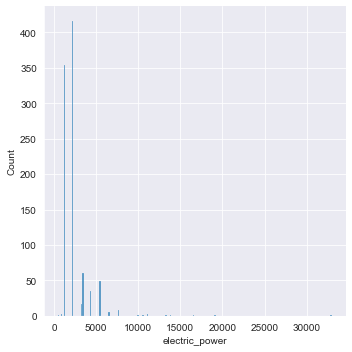

In [10]:
sns.displot(cleaned_df['electric_power'])

In [11]:
cleaned_df[cleaned_df['electric_power'] > 30000]

,bedroom,bathroom,land_area,building_area,prop_type,certificate,electric_power,floor_num,year_built,prop_cond,furniture_cond,ad_id,facing,price,car_garage
335,9.0,6.0,561,2000,House,SHM - Sertifikat Hak Milik,33000.0,5.0,2005.0,Good,Furnished,hos14154604,NaN,40.0,5.0


For me, this house has spectacular price. So, we want to check the distribution of houses' price.

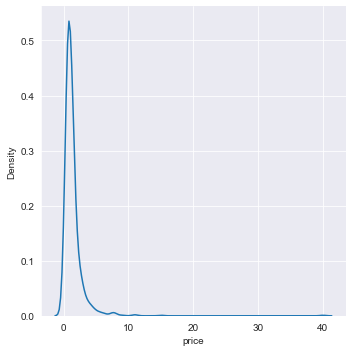

In [12]:
sns.displot(cleaned_df['price'], kind='kde')

In [13]:
cleaned_df[cleaned_df['price'] > 3].shape

(65, 15)

There are **65 houses** getting price of **more than 3 billions rupiah**

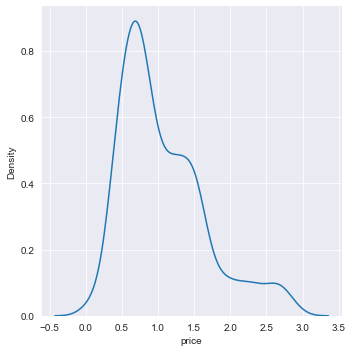

In [14]:
sns.displot(cleaned_df[cleaned_df['price'] < 3]['price'], kind='kde')

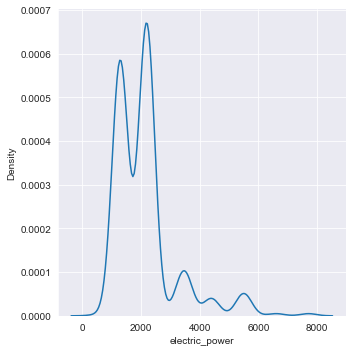

In [15]:
sns.displot(cleaned_df[cleaned_df['price'] < 3]['electric_power'], kind='kde')

From the distribution plot of houses' price, we can assume **prices** are **distributed normally**. So does **electric_power**, roughly.

In [16]:
# Therefore, we only take houses whose price is less than 3 billions rupiah
cleaned_df = cleaned_df[cleaned_df['price'] < 3]

cleaned_df.shape

(889, 15)

#### Handle Missing Values

In [17]:
# Show all missing values
is_null = cleaned_df.isnull().sum()
is_null = is_null[is_null > 0].copy()
is_null

certificate         3
year_built        446
prop_cond          36
furniture_cond    153
facing            495
dtype: int64

##### Categorical Features

In [18]:
null_cat_cols = [col for col in is_null.index if col != "year_built"]
null_cat_cols

['certificate', 'prop_cond', 'furniture_cond', 'facing']

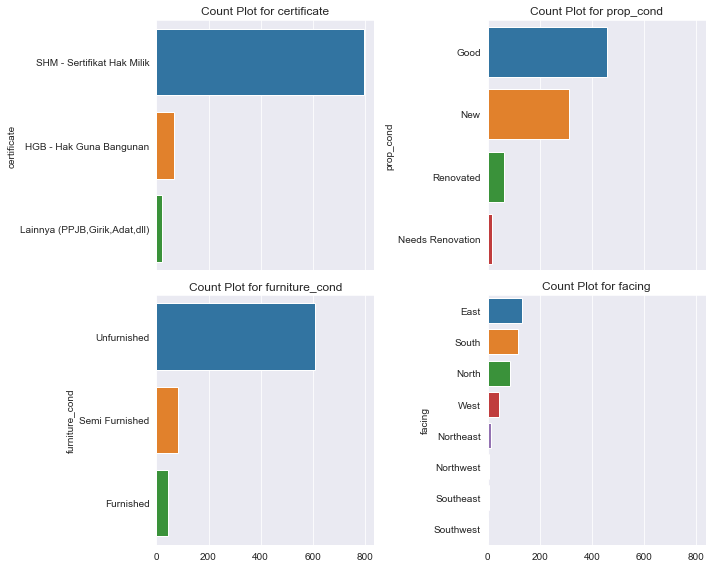

In [19]:
# Look at the visualization of count plot
fig, axs = plt.subplots(math.ceil(len(null_cat_cols) / 2), 2, sharex=True, figsize=(10, 8))

count = 0
for i in range(math.ceil(len(null_cat_cols) / 2)):
    for j in range(2):
        col = null_cat_cols[count]
        sns.countplot(y=cleaned_df[col], ax=axs[i][j], order=cleaned_df[col].value_counts().index)
        axs[i][j].set_title(f"Count Plot for {col}")
        axs[i][j].set(xlabel=None)
        count += 1
    
fig.tight_layout()
plt.show()

In [20]:
cleaned_df['certificate'].mode().values

array(['SHM - Sertifikat Hak Milik'], dtype=object)

In [21]:
# Simple Imputation: Mode (for each feature above)
cleaned_df['certificate'] = cleaned_df['certificate'].fillna("SHM - Sertifikat Hak Milik")
cleaned_df['prop_cond'] = cleaned_df['prop_cond'].fillna("Good")
cleaned_df['furniture_cond'] = cleaned_df['furniture_cond'].fillna("Unfurnished")
cleaned_df['facing'] = cleaned_df['facing'].fillna("East")

##### Numerical Features

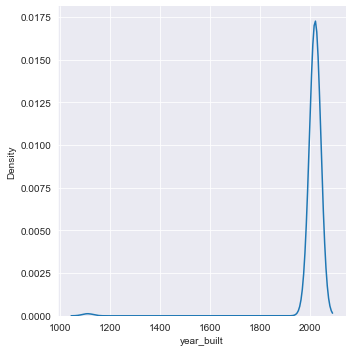

In [22]:
# Year built
sns.displot(cleaned_df['year_built'], kind='kde')

In [23]:
# Let's check if there is any house whose year built is in year less than 1900
cleaned_df[cleaned_df['year_built'] < 1900]

,bedroom,bathroom,land_area,building_area,prop_type,certificate,electric_power,floor_num,year_built,prop_cond,furniture_cond,ad_id,facing,price,car_garage
641,5.0,5.0,227,227,House,SHM - Sertifikat Hak Milik,4400.0,2.0,1111.0,Renovated,Semi Furnished,hos14355391,East,2.35,1.0
998,1.0,1.0,220,120,House,SHM - Sertifikat Hak Milik,3500.0,2.0,1111.0,Renovated,Semi Furnished,hos14241568,West,2.00,0.0
999,3.0,2.0,81,120,House,SHM - Sertifikat Hak Milik,2200.0,2.0,1111.0,Good,Semi Furnished,hos14241498,East,1.25,1.0


I think removing these rows will not do any harm. So, let's do that!

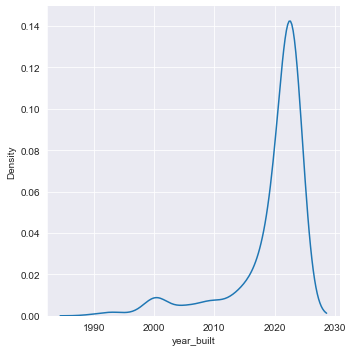

In [24]:
# Remove any rows whose index is in (641, 998, 999)
cleaned_df.drop([641, 998, 999], inplace=True)

# Let's see the real distribution plot once again
sns.displot(cleaned_df['year_built'], kind='kde')

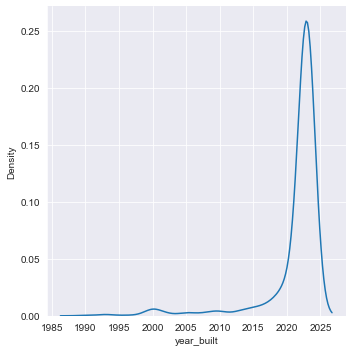

In [25]:
# Since the distribution plot show a sign of there is left skewness, then we want to impute the NaN values by **MEDIAN**
cleaned_df['year_built'] = cleaned_df['year_built'].fillna(round(cleaned_df['year_built'].median()))

# Let's see the real distribution plot once again
sns.displot(cleaned_df['year_built'], kind='kde')

In [26]:
cleaned_df.isnull().sum()

bedroom           0
bathroom          0
land_area         0
building_area     0
prop_type         0
certificate       0
electric_power    0
floor_num         0
year_built        0
prop_cond         0
furniture_cond    0
ad_id             0
facing            0
price             0
car_garage        0
dtype: int64

Missing values are clearly handled.

## Checkpoint

In [27]:
cleaned_df.head()

,bedroom,bathroom,land_area,building_area,prop_type,certificate,electric_power,floor_num,year_built,prop_cond,furniture_cond,ad_id,facing,price,car_garage
0,4.0,3.0,77,112,House,SHM - Sertifikat Hak Milik,2200.0,2.0,2021.0,Good,Semi Furnished,hos14357221,East,1.350,2.0
1,3.0,3.0,73,93,House,SHM - Sertifikat Hak Milik,2200.0,2.0,2023.0,New,Unfurnished,hos13901815,East,0.995,0.0
2,2.0,2.0,105,90,House,SHM - Sertifikat Hak Milik,2200.0,2.0,2023.0,Renovated,Unfurnished,hos14186873,South,1.020,3.0
3,4.0,3.0,210,150,House,SHM - Sertifikat Hak Milik,2200.0,1.0,2023.0,Good,Unfurnished,hos14314243,East,1.500,0.0
4,2.0,2.0,60,50,House,SHM - Sertifikat Hak Milik,2200.0,2.0,2023.0,Good,Unfurnished,hos13940617,North,1.100,1.0


In [28]:
cleaned_df.shape

(886, 15)